In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing all the important libraries




In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


**Importing data from the local drive**


In [6]:
df = pd.read_csv('/content/drive/MyDrive/Copy of Hotel Bookings.csv')

**This is how our data looks like**

In [57]:
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


**From which country most guest are coming**

In [36]:
df[df['country']=='PRT']['hotel'].value_counts()

Resort Hotel    14238
City Hotel      13211
Name: hotel, dtype: int64

In [37]:
top_10_countries = df[df['is_canceled']==0]['country'].value_counts()[:10]

In [38]:
top_10_countries = top_10_countries.reset_index().rename(columns = {'index':'country','country':'number_of_bookings'})
top_10_countries['percentage'] = (top_10_countries['number_of_bookings']/top_10_countries['number_of_bookings'].sum())*100

In [39]:
top_10_countries

,country,number_of_bookings,percentage
0,PRT,17662,34.015099
1,GBR,8448,16.269933
2,FRA,7104,13.681535
3,ESP,5390,10.380556
4,DEU,4334,8.346815
5,IRL,2348,4.521994
6,ITA,1991,3.834450
7,BEL,1670,3.216239
8,NLD,1561,3.006317
9,USA,1416,2.727063


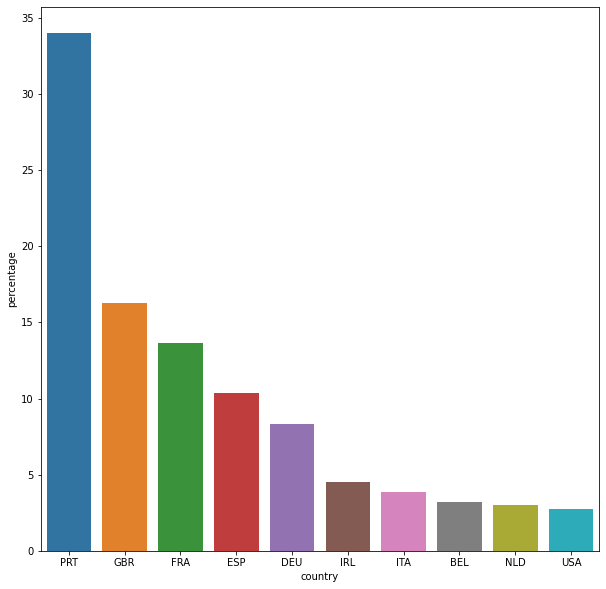

In [40]:
plt.figure(figsize=(10,10))
ax = sns.barplot(x="country", y="percentage", data=top_10_countries)

Which month have the highest number of cancellations

In [42]:
df[df['is_canceled'] == 1]['arrival_date_month'].value_counts()

August       3618
July         3192
May          2442
April        2404
June         2353
March        1829
October      1637
September    1636
February     1414
December     1373
November     1052
January      1037
Name: arrival_date_month, dtype: int64

Text(0, 0.5, 'number_of_cancelation')

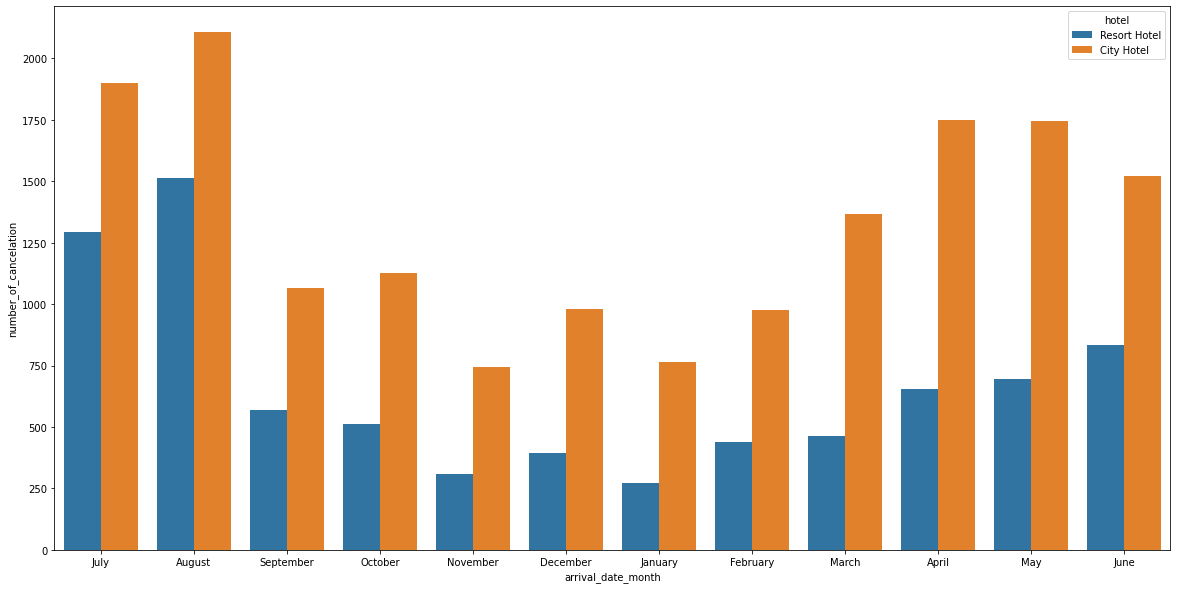

In [43]:
plt.figure(figsize = (20,10))
ax = sns.countplot(x = 'arrival_date_month',hue = 'hotel', data = df[df['is_canceled'] == 1])
ax.set_ylabel('number_of_cancelation')

Effect of lead time on cancelation

Text(0, 0.5, 'Cancelations [%]')

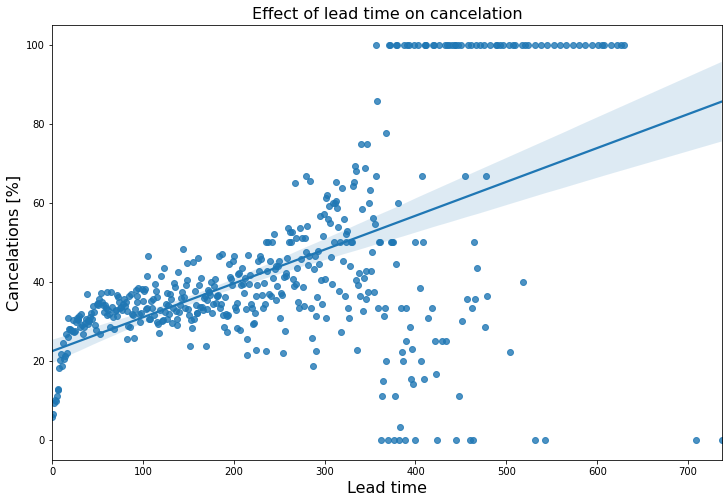

In [44]:
lead_time_df = df.groupby('lead_time')['is_canceled'].describe()
plt.figure(figsize=(12, 8))
sns.regplot(x=lead_time_df.index, y=lead_time_df["mean"].values * 100)
plt.title("Effect of lead time on cancelation", fontsize=16)
plt.xlabel("Lead time", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)

In [45]:
lead_time_df

,count,mean,std,min,25%,50%,75%,max
lead_time,,,,,,,,
0,5862.0,0.058683,0.235051,0.0,0.0,0.0,0.0,1.0
1,3150.0,0.066667,0.249483,0.0,0.0,0.0,0.0,1.0
2,1891.0,0.094659,0.292821,0.0,0.0,0.0,0.0,1.0
3,1690.0,0.100000,0.300089,0.0,0.0,0.0,0.0,1.0
4,1552.0,0.097938,0.297327,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
622,2.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
626,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0
629,2.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


Display the number of kids in both hotels.

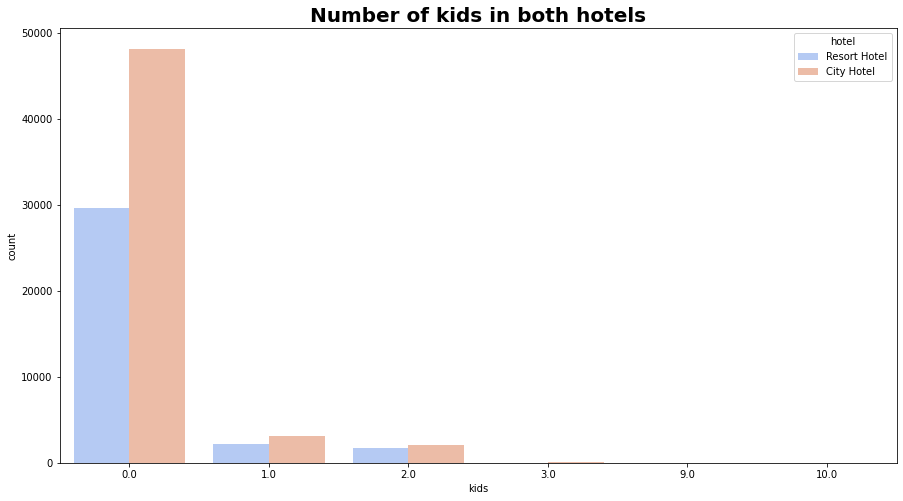

In [55]:
plt.figure(figsize=(15, 8))
sns.countplot(x='kids',hue='hotel', data=df1, palette='coolwarm')
plt.title("Number of kids in both hotels",fontweight="bold", size=20)

plt.show()

Cancellation percentage by year

Text(0, 0.5, 'cancellation percentage')

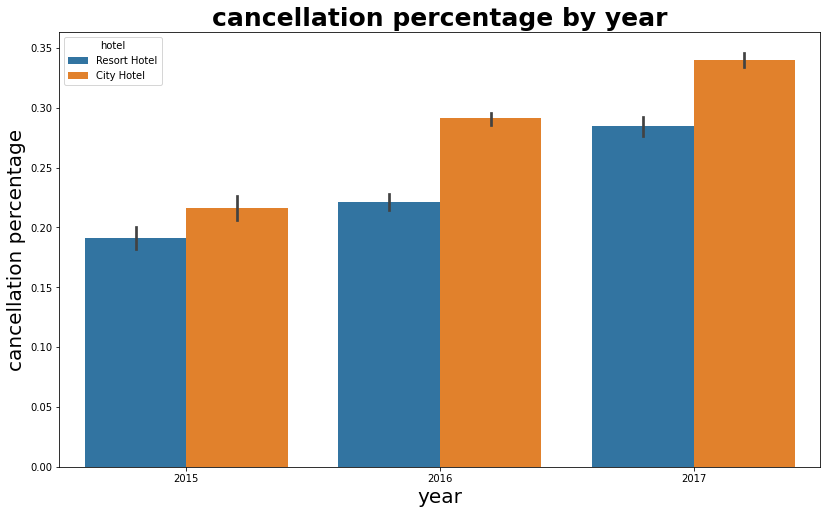

In [56]:
plt.figure(figsize=(30, 8))
plt.subplot(1, 2, 1)

sns.barplot(data = df, x= 'arrival_date_year', y = 'is_canceled',hue = 'hotel' )
plt.title('cancellation percentage by year',fontweight="bold", size=25)

plt.xlabel('year',size=20)
plt.ylabel('cancellation percentage',size=20)

Effect of deposit type on cancelation

Text(0, 0.5, 'Cancelations [%]')

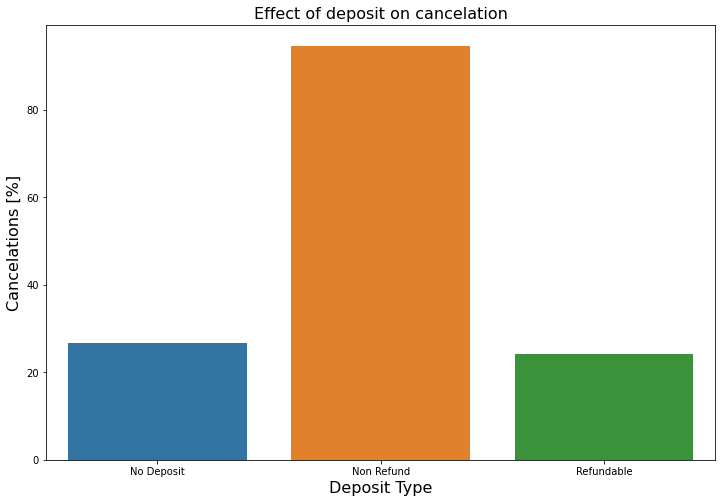

In [46]:
deposit_df = df.groupby('deposit_type')['is_canceled'].describe()
plt.figure(figsize=(12, 8))
sns.barplot(x=deposit_df.index, y=deposit_df["mean"].values * 100)
plt.title("Effect of deposit on cancelation", fontsize=16)
plt.xlabel("Deposit Type", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)

In [47]:
deposit_df

,count,mean,std,min,25%,50%,75%,max
deposit_type,,,,,,,,
No Deposit,85796.0,0.267833,0.442833,0.0,0.0,0.0,1.0,1.0
Non Refund,1037.0,0.946962,0.224217,0.0,1.0,1.0,1.0,1.0
Refundable,107.0,0.242991,0.430908,0.0,0.0,0.0,0.0,1.0


**Heatmap - to show the relation between the variables**

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.183730,0.087665,0.000864,0.005281,0.059599,0.082818,0.080295,0.067027,-0.020593,-0.090145,0.050965,-0.050553,-0.094050,0.004302,0.126675,-0.183704,-0.121794
lead_time,0.183730,1.000000,0.138786,0.100970,0.009865,0.233679,0.309916,0.137500,0.027704,-0.003954,-0.148009,0.005517,-0.076399,0.076764,0.132163,0.019758,-0.085753,0.033038
arrival_date_year,0.087665,0.138786,1.000000,-0.514123,-0.010282,0.005000,0.003930,0.037455,0.040791,-0.023401,0.024048,-0.053973,0.028195,0.008786,-0.028184,0.175988,-0.038615,0.064415
arrival_date_week_number,0.000864,0.100970,-0.514123,1.000000,0.093640,0.026096,0.027368,0.023778,0.013417,0.013848,-0.037271,0.006634,-0.020757,0.011464,0.013883,0.097718,0.008637,0.046125
arrival_date_day_of_month,0.005281,0.009865,-0.010282,0.093640,1.000000,-0.017278,-0.027566,-0.001358,0.015846,-0.000752,-0.004401,-0.008687,0.000661,0.006498,0.006585,0.022246,0.008679,-0.001587
stays_in_weekend_nights,0.059599,0.233679,0.005000,0.026096,-0.017278,1.000000,0.551159,0.086270,0.027842,0.013488,-0.107932,-0.020676,-0.054141,0.049066,-0.032017,0.036015,-0.042651,0.030461
stays_in_week_nights,0.082818,0.309916,0.003930,0.027368,-0.027566,0.551159,1.000000,0.094405,0.030252,0.015891,-0.114665,-0.018904,-0.056928,0.084199,0.001796,0.050935,-0.043987,0.035449
adults,0.080295,0.137500,0.037455,0.023778,-0.001358,0.086270,0.094405,1.000000,0.022419,0.016249,-0.173194,-0.042158,-0.117754,-0.049145,-0.016125,0.245287,0.009261,0.110777
children,0.067027,0.027704,0.040791,0.013417,0.015846,0.027842,0.030252,0.022419,1.000000,0.017482,-0.045893,-0.019136,-0.028476,0.030910,-0.020526,0.326293,0.037181,0.044391
babies,-0.020593,-0.003954,-0.023401,0.013848,-0.000752,0.013488,0.015891,0.016249,0.017482,1.000000,-0.013017,-0.005336,-0.008869,0.080791,-0.006865,0.022694,0.030476,0.094475


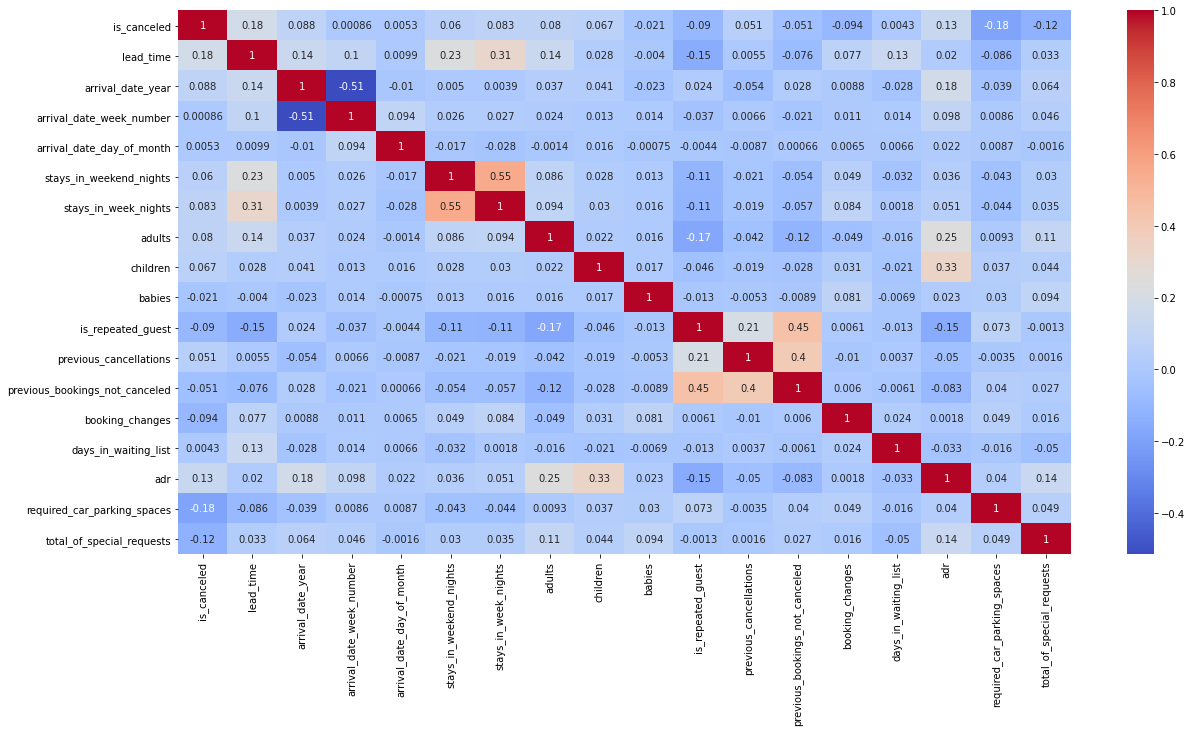

In [48]:
plt.figure(figsize=(20,10))
c=df.corr()
sns.heatmap(c,cmap='coolwarm', annot=True)
c

#Thank You